Use this notebook to complete PS#5. Complete __the emphasized questions__ and submit the results on paper. Feel free change the code as you want -- if you mess something up, you can always reload it from scratch.

To run each step, put your cursor in the box and click the "Run" button.

Start by loading some Python libraries.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

## C&O 10.25

Verify that the basic equations of stellar structure [Eqs. (10.6), (10.7), (10.36), (10.68)] are satisfied by the 1 M$_\odot$ StatStar model.

1. First, run the 1 M$_\odot$ model. Use L = 0.86071 L$_\odot$, T = 5500.2 K, X = 0.7, and Z = 0.008.

In [3]:
from statstar import StatStar

 Enter the mass of the star (in solar units):1.0
 Enter the luminosity of the star (in solar units):0.86071
 Enter the effective temperature of the star (in K):5500.2
 Enter the mass fraction of hydrogen (X):0.7
 Enter the mass fraction of metals (Z):0.008
CONGRATULATIONS, I THINK YOU FOUND IT!
However, be sure to look at your model carefully.
***** The integration has been completed *****
      The model has been stored in starmodl_py.dat


In case you messed up the first run, you can run StatStar again, specifying the correct parameters from the command line:

In [4]:
StatStar(1.,0.86071,5500.2,0.7,0.008)

CONGRATULATIONS, I THINK YOU FOUND IT!
However, be sure to look at your model carefully.
***** The integration has been completed *****
      The model has been stored in starmodl_py.dat


(0, 0, 423)

2. Copy the results to a new file, and then peruse the results. The output table lists the following quantities:
- r, stellar radius in meters
- Qm, a dimensionless measure of mass, where Qm $\equiv$ 1.0 - M$_r$/M$_\mathrm{tot}$ (see Notes)
- L$_r$, interior luminosity in Watts
- T, temperature in K
- P, pressure in Pascals
- rho, mass density in kg/m$^3$
- kap(pa), opacity
- eps(ilon), energy generation rate W/kg
- whether the energy transport is dominated by radiation (r) or convection (c)
- dlnP/dlnT, the gradient of ln(P) -- natural log of P -- with ln(T)

In [5]:
mv starmodl_py.dat starmodl_1p0.dat

In [6]:
model1p0 = pd.read_csv('starmodl_1p0.dat', comment='#', sep='\s+')
header1p0 = pd.read_csv('starmodl_1p0.dat', nrows=15, header=None, names=['Header'])
for i in range(15):
    print(header1p0['Header'][i])
model1p0

# A Homogeneous Main-Sequence Model
# The surface conditions are:        The central conditions are:
# Mtot =  1.000000E+00 Msun          Mc/Mtot     =  4.00418E-04
# Rtot =  1.020998E+00 Rsun          Rc/Rtot     =  1.90000E-02
# Ltot =  8.607100E-01 Lsun          Lc/Ltot     =  7.67225E-02
# Teff =  5.500200E+03 K             Density     =  7.72529E+04 kg/m**3
# X    =  7.000000E-01               Temperature =  1.41421E+07 K
# Y    =  2.920000E-01               Pressure    =  1.46284E+16 Pa
# Z    =  8.000000E-03               epsilon     =  3.17232E-02 W/kg
#                                    dlnP/dlnT   =  2.49808E+00
# Notes:
# (1) Mass is listed as Qm = 1.0 - M_r/Mtot
# (2) Convective zones are indicated by c
# (3) dlnP/dlnT may be limited to +99.9 or -99.9# if so it is
# labeled by *


,r,Qm,L_r,T,P,rho,kap,eps,r/c,dlPdlT
0,13500000.0,1.000000e+00,2.530000e+25,14000000.0,1.450000e+16,7.720000e+04,0.140,1.510000e-03,c,2.5
1,20600000.0,9.990000e-01,2.830000e+25,13900000.0,1.430000e+16,7.660000e+04,0.142,1.460000e-03,c,2.5
2,27700000.0,9.970000e-01,3.400000e+25,13800000.0,1.400000e+16,7.570000e+04,0.144,1.390000e-03,c,2.5
3,34800000.0,9.930000e-01,4.280000e+25,13700000.0,1.360000e+16,7.450000e+04,0.146,1.310000e-03,c,2.5
4,41900000.0,9.880000e-01,5.510000e+25,13500000.0,1.320000e+16,7.310000e+04,0.149,1.210000e-03,c,2.5
...,...,...,...,...,...,...,...,...,...,...
419,708000000.0,1.180000e-11,3.290000e+26,13200.0,6.640000e+02,3.720000e-06,13.000,5.650000e-68,r,4.8
420,708000000.0,3.400000e-12,3.290000e+26,9880.0,1.660000e+02,1.240000e-06,14.800,1.200000e-74,r,4.9
421,709000000.0,6.080000e-13,3.290000e+26,6580.0,2.260000e+01,2.520000e-07,17.200,3.790000e-85,r,4.8
422,710000000.0,3.940000e-14,3.290000e+26,3290.0,7.970000e-01,1.750000e-08,23.000,1.670000e-106,r,4.2


3. Find two adjacent shells at temperatures near $5\times10^6$ K.

In [7]:
model1p0[30:40]

,r,Qm,L_r,T,P,rho,kap,eps,r/c,dlPdlT
30,227000000.0,0.324,3.290000e+26,6080000.0,8.970000e+14,11000.0,0.390,3.820000e-06,r,4.1
31,234000000.0,0.299,3.290000e+26,5850000.0,7.690000e+14,9820.0,0.401,2.750000e-06,r,4.1
32,241000000.0,0.275,3.290000e+26,5630000.0,6.590000e+14,8730.0,0.412,1.980000e-06,r,4.1
33,248000000.0,0.253,3.290000e+26,5430000.0,5.630000e+14,7750.0,0.424,1.410000e-06,r,4.2
34,255000000.0,0.233,3.290000e+26,5220000.0,4.810000e+14,6870.0,0.435,1.000000e-06,r,4.2
35,262000000.0,0.213,3.290000e+26,5030000.0,4.100000e+14,6080.0,0.446,7.100000e-07,r,4.2
36,269000000.0,0.195,3.290000e+26,4840000.0,3.490000e+14,5380.0,0.458,5.000000e-07,r,4.2
37,276000000.0,0.178,3.290000e+26,4660000.0,2.970000e+14,4750.0,0.469,3.500000e-07,r,4.3
38,284000000.0,0.162,3.290000e+26,4480000.0,2.520000e+14,4200.0,0.481,2.440000e-07,r,4.3
39,291000000.0,0.148,3.290000e+26,4320000.0,2.140000e+14,3700.0,0.492,1.700000e-07,r,4.3


__4. Using these two shells, numerically compute the derivatives on the left-hand sides of the stellar structure equations. For example:__

    $\frac{dP}{dr} \approx \frac{P_{i+1} - P_i}{r_{i+1} - r_i}$


__5. Compare the results with the values on the right-hand sides of the equations using average values of quantities for the two zones (e.g., $M_r = (M_i+M_{i+1})/2$). Compute percent differences between the two sides of each equation. Assume complete ionization, X = 0.7, Y = 0.292, and Z = 0.008.__

## C&O 10.26

Now, build a second main-sequence star with a mass of 0.75 M$_\odot$ that has a homogeneous composition of X = 0.7, Y = 0.292, and Z = 0.008. For these values, the model's luminosity and effective temperature are 0.189 L$_\odot$ and 3851.55 K, respectively.

In [8]:
StatStar(0.75,0.189,3851.55,0.7,0.008)

CONGRATULATIONS, I THINK YOU FOUND IT!
However, be sure to look at your model carefully.
***** The integration has been completed *****
      The model has been stored in starmodl_py.dat


(0, 0, 425)

In [9]:
mv starmodl_py.dat starmodl_0p75.dat

In [10]:
header0p75 = pd.read_csv('starmodl_0p75.dat', nrows=15, header=None, names=['Header'])
model0p75 = pd.read_csv('starmodl_0p75.dat', comment='#', sep='\s+')
for i in range(15):
    print(header0p75['Header'][i])
model0p75

# A Homogeneous Main-Sequence Model
# The surface conditions are:        The central conditions are:
# Mtot =  7.500000E-01 Msun          Mc/Mtot     =  2.97025E-04
# Rtot =  9.756933E-01 Rsun          Rc/Rtot     =  1.70000E-02
# Ltot =  1.890000E-01 Lsun          Lc/Ltot     =  6.03622E-02
# Teff =  3.851550E+03 K             Density     =  6.87551E+01
# X    =  7.000000E-01               Temperature =  1.11276E+07
# Y    =  2.920000E-01               Pressure    =  1.02441E+17 dynes/cm**2
# Z    =  8.000000E-03               epsilon     =  9.85106E+01 ergs/s/g
#                                    dlnP/dlnT   =  2.49876E+00
# Notes:
# (1) Mass is listed as Qm = 1.0 - M_r/Mtot
# (2) Convective zones are indicated by c
# (3) dlnP/dlnT may be limited to +99.9 or -99.9# if so it is
# labeled by *


,r,Qm,L_r,T,P,rho,kap,eps,r/c,dlPdlT
0,1.150000e+09,1.000000e+00,4.360000e+31,11000000.0,1.020000e+17,6.870000e+01,2.53,4.690000e+00,c,2.5
1,1.830000e+09,9.990000e-01,4.980000e+31,11000000.0,1.000000e+17,6.810000e+01,2.56,4.540000e+00,c,2.5
2,2.510000e+09,9.970000e-01,6.200000e+31,10900000.0,9.830000e+16,6.730000e+01,2.59,4.340000e+00,c,2.5
3,3.190000e+09,9.940000e-01,8.150000e+31,10800000.0,9.590000e+16,6.630000e+01,2.64,4.080000e+00,c,2.5
4,3.870000e+09,9.890000e-01,1.090000e+32,10700000.0,9.290000e+16,6.510000e+01,2.71,3.790000e+00,c,2.5
...,...,...,...,...,...,...,...,...,...,...
421,6.760000e+10,1.140000e-11,7.230000e+32,10300.0,4.300000e+03,3.090000e-09,262.00,3.270000e-69,r,4.8
422,6.770000e+10,3.290000e-12,7.230000e+32,7750.0,1.080000e+03,1.030000e-09,298.00,2.070000e-76,r,4.9
423,6.780000e+10,5.910000e-13,7.230000e+32,5160.0,1.470000e+02,2.100000e-10,347.00,9.560000e-88,r,4.8
424,6.780000e+10,3.920000e-14,7.230000e+32,2580.0,5.260000e+00,1.490000e-11,473.00,8.300000e-111,r,4.2


__Compare the central temperatures, pressures, densities, and energy generation rates between the 1.0 M$_\odot$ and 0.75 M$_\odot$ models. Explain the differences in the central conditions of the two models.__

## C&O 10.27

(a) Plot P versus r, M$_r$ versus r, L$_r$ versus r, and T versus r for the 1 M$_\odot$ model.

/Users/drupke/anaconda3/envs/astroconda/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


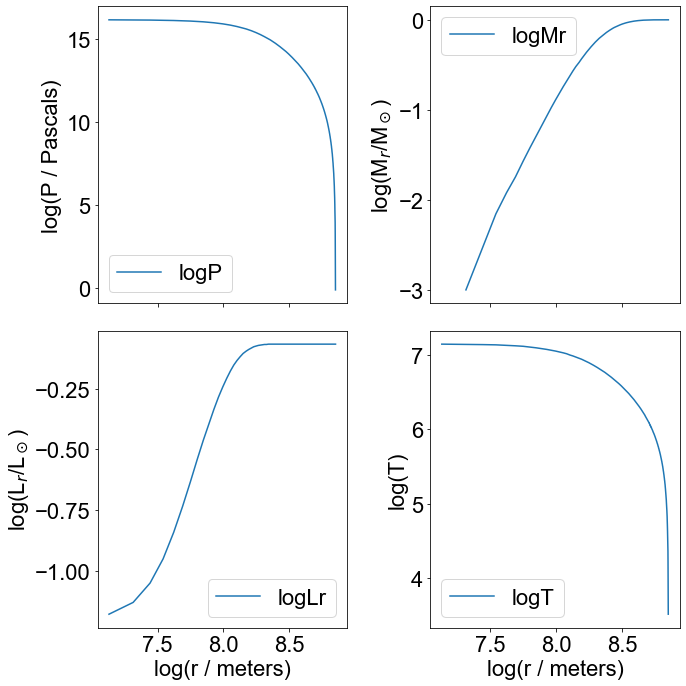

In [11]:
model1p0['logT'] = np.log10(model1p0['T'])
model1p0['logLr'] = np.log10(model1p0['L_r']/3.826e26)
model1p0['logMr'] = np.log10(1. * (1. - model1p0['Qm']))
model1p0['logP'] = np.log10(model1p0['P'])
model1p0['logr'] = np.log10(model1p0['r'])

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)

fig, axs = plt.subplots(2,2, sharex=True, figsize=(10,10))
P_v_R_1p0 = model1p0.plot(ax=axs[0,0], x='logr',y='logP', ylabel='log(P / Pascals)')
Mr_v_R_1p0 = model1p0.plot(ax=axs[0,1], x='logr',y='logMr', ylabel='log(M$_r$/M$_\odot$)')
Lr_v_R_1p0 = model1p0.plot(ax=axs[1,0], x='logr',y='logLr', ylabel='log(L$_r$/L$_\odot$)', xlabel='log(r / meters)')
T_v_R_1p0 = model1p0.plot(ax=axs[1,1], x='logr',y='logT', ylabel='log(T)', xlabel='log(r / meters)')
fig.tight_layout()

__(b) At what temperature has L$_r$ reached approximately 99% of its surface value? 50% of its surface value? Is the temperature associated with 50% of the total luminosity consistent with the rough estimate found in Eq. (10.27)? Why or why not?__

__(c) What are the values of M$_r$/M$_\mathrm{tot}$ for the two temperatures found in part (b)?__

Now compute StatStar models for M = 0.5, 2.0, 4.0, 8.0, and 13.0 M$_\odot$:

| M/M$_\odot$ 	| L/L$_\odot$ 	| T$_e$ (K) 	|
|-------------	|-------------	|-----------	|
| 0.5         	| 0.02150     	| 2331.45   	|
| 2.0         	| 22.61200    	| 11218.40  	|
| 4.0         	| 341.09998   	| 17904.00  	|
| 8.0         	| 3421.51978  	| 25613.60  	|
| 13.0        	| 15246.32910 	| 32149.90  	|

In [112]:
StatStar(2.0,22.61200,11218.40,0.7,0.008)
header = pd.read_csv('starmodl_py.dat', nrows=15, header=None, names=['Header'])
model = pd.read_csv('starmodl_py.dat', comment='#', sep='\s+')
for i in range(15):
    print(header['Header'][i])

CONGRATULATIONS, I THINK YOU FOUND IT!
However, be sure to look at your model carefully.
***** The integration has been completed *****
      The model has been stored in starmodl_py.dat
# A Homogeneous Main-Sequence Model
# The surface conditions are:        The central conditions are:
# Mtot =  2.000000E+00 Msun          Mc/Mtot     =  8.02031E-05
# Rtot =  1.257944E+00 Rsun          Rc/Rtot     =  1.20000E-02
# Ltot =  2.261200E+01 Lsun          Lc/Ltot     =  6.74047E-02
# Teff =  1.121840E+04 K             Density     =  6.56797E+04 kg/m**3
# X    =  7.000000E-01               Temperature =  2.19446E+07 K
# Y    =  2.920000E-01               Pressure    =  1.92988E+16 Pa
# Z    =  8.000000E-03               epsilon     =  1.82775E+00 W/kg
#                                    dlnP/dlnT   =  2.49206E+00
# Notes:
# (1) Mass is listed as Qm = 1.0 - M_r/Mtot
# (2) Convective zones are indicated by c
# (3) dlnP/dlnT may be limited to +99.9 or -99.9# if so it is
# labeled by *


In [122]:
mass = np.array([0.5,0.75,1.0,2.0,4.0,8.0,13.0])
tcore = np.log10(np.array([,,1.41e7,,,,]))
rhocore = np.log10(np.array([,,7.73e4,,,,]))
epscore = np.log10(np.array([,,3.17e-2,,,,]))
teff = np.log10(np.array([,,5500,,,,]))
rad = np.log10(np.array([,,1.03,,,,]))

SyntaxError: invalid syntax (<ipython-input-122-b38822b451f5>, line 2)